In [1]:
import wradlib as wrl
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

bin_file_name_prefix = "raa01-yw2017.002_10000-"

# Subdirectories with years
image_dir="/data/Radarbilder_DWD/minutely/"
data_dir="/data_hdd/Radardaten/minutely/uncompressed/"

year=2016
month=8
day_begin=10
day_end=17

In [2]:
def get_filename_prefix(year, month, day):
    date_string_w_full_year = "{:4d}{:02d}{:02d}".format(year, month, day)
    return bin_file_name_prefix + date_string_w_full_year[2:]

In [3]:
def read_data_from_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file(radfile)
    data, attrs = wrl.io.read_radolan_composite(radfile)
    data = np.ma.masked_equal(data, -9999)
    return data

In [17]:
os.environ["WRADLIB_DATA"] = data_dir + str(year) + "/"
os.chdir(data_dir + str(year) + "/")
bin_data = np.array([])
for day in range(day_begin, day_end):
    filename_prefix = get_filename_prefix(year, month, day)
    for file in glob.glob(filename_prefix + "*"):
        try:
            if len(bin_data)==0:
                bin_data=read_data_from_radolan(file)
            else:
                data = read_data_from_radolan(file)
                np.concatenate((bin_data, data))
        except OSError as e:
            print("Could not read file: " + str(e))

In [18]:
print(type(bin_data))
print(len(bin_data))
print("{} / {}".format())

1100

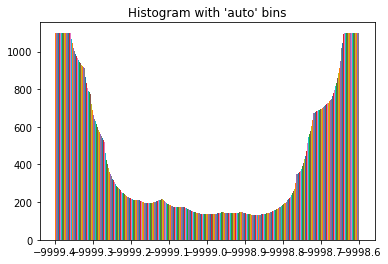

In [19]:
#hist, bin_edges = np.histogram(bin_data, density=True)
plt.hist(bin_data, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()